<a href="https://colab.research.google.com/github/Shivanshjoshi11/IPL_ANALYSIS/blob/main/IPL_ANALYTICS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

#visualisation tools
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
files.upload() 

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shivanshj","key":"f771b65b6f47953b718bd90f82bc6fff"}'}

In [3]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [4]:
!kaggle datasets download -d nowke9/ipldata

  0% 0.00/1.20M [00:00<?, ?B/s]
100% 1.20M/1.20M [00:00<00:00, 80.5MB/s]


In [5]:
!ls

ipldata.zip  kaggle.json  sample_data


In [6]:
!unzip /content/ipldata.zip

Archive:  /content/ipldata.zip
  inflating: deliveries.csv          
  inflating: matches.csv             


In [7]:
balls = pd.read_csv('deliveries.csv')

mat = pd.read_csv('matches.csv')

In [8]:
balls.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,0,0,0,1,0,0,1,1,NaN,NaN,NaN


In [9]:
mat.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [10]:
balls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [11]:
mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

<h1>Missing Data</h1>

In [12]:
balls['player_dismissed'].fillna('None' , inplace = True)

In [13]:
balls['dismissal_kind'].fillna('None' , inplace = True)

In [14]:
balls['fielder'].fillna('None' , inplace = True)

In [15]:
over10 = balls[balls['over']<=6]
over10

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,None,None,None
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,None,None,None
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,None,None,None
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,None,None,None
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178986,11415,2,Chennai Super Kings,Mumbai Indians,6,3,SR Watson,SK Raina,SL Malinga,0,0,0,0,0,0,0,0,0,None,None,None
178987,11415,2,Chennai Super Kings,Mumbai Indians,6,4,SR Watson,SK Raina,SL Malinga,0,0,0,0,0,0,6,0,6,None,None,None
178988,11415,2,Chennai Super Kings,Mumbai Indians,6,5,SR Watson,SK Raina,SL Malinga,0,1,0,0,0,0,1,1,2,None,None,None
178989,11415,2,Chennai Super Kings,Mumbai Indians,6,6,SR Watson,SK Raina,SL Malinga,0,0,0,0,0,0,4,0,4,None,None,None


In [16]:
mark = (over10['player_dismissed'] == 'None')
temp = [1]*56566

over10['wicket'] = temp
over10['wicket'][mark] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._w

In [17]:
max_runs10 = over10.groupby(['match_id','inning'] , as_index = False)['total_runs' , 'wicket'].sum()
max_runs10

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,match_id,inning,total_runs,wicket
0,1,1,59,1
1,1,2,54,1
2,2,1,61,1
3,2,2,59,1
4,3,1,52,1
...,...,...,...,...
1523,11413,2,56,0
1524,11414,1,42,2
1525,11414,2,42,0
1526,11415,1,46,2


In [18]:
max_runs10['inning'].value_counts()

1    756
2    754
3      9
4      7
5      2
Name: inning, dtype: int64

In [19]:
mat[mat['result'] == 'no result']

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [20]:
for i in range(0,1282):
    if max_runs10['inning'][i] == max_runs10['inning'][i+1]:
        print(i)

606
1103


In [21]:
line = pd.DataFrame({"match_id":301, "inning":2, "total_runs":0, "wicket":0}, index=[606.5])
max_runs10 = max_runs10.append(line, ignore_index=False)
max_runs10 = max_runs10.sort_index().reset_index(drop=True)

In [22]:
line = pd.DataFrame({"match_id":546, "inning":2, "total_runs":0, "wicket":0}, index=[1104.5])
max_runs10 = max_runs10.append(line, ignore_index=False)
max_runs10 = max_runs10.sort_index().reset_index(drop=True)

In [24]:
temp = max_runs10[max_runs10['inning']<=2]

total_runs1 = np.array(temp['total_runs'][::2])
total_runs2 = np.array(temp['total_runs'][1::2])
wicket_1 = np.array(temp['wicket'][::2])
wicket_2 = np.array(temp['wicket'][1::2])
match_id = np.array(list(range(1,757)))


col = {'id':match_id , 'total_runs1':total_runs1 , 'total_runs2':total_runs2, 'wicket_1':wicket_1, 'wicket_2':wicket_2}
over10_batting = pd.DataFrame(col)

In [25]:
summary_10 = pd.merge(mat, over10_batting, on = 'id', how = 'left')

In [26]:
summary_10.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,total_runs1,total_runs2,wicket_1,wicket_2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,59.0,54.0,1.0,1.0
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,61.0,59.0,1.0,1.0
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,52.0,73.0,1.0,0.0
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,35.0,56.0,1.0,2.0
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,41.0,43.0,2.0,2.0


In [27]:
nana = np.empty((1,757))
nana[:] = np.nan

In [28]:
super_overs = max_runs10[max_runs10['inning']>2]
index = pd.Series(range(1,19))
super_overs.set_index(index)

,match_id,inning,total_runs,wicket
1,34,3,11,2
2,34,4,6,0
3,126,3,15,1
4,126,4,18,0
5,190,3,9,2
6,190,4,10,1
7,388,3,20,0
8,388,4,15,0
9,401,3,15,0
10,401,4,11,2


In [29]:
super_over_run1 = list(super_overs['total_runs'][::2])

super_over_run1 = [int(i) for i in super_over_run1]


super_over_run2 = list(super_overs['total_runs'][1::2])

super_over_run2 = [int(i) for i in super_over_run2]

super_over_list_temp = list(set(list(super_overs['match_id'])))
super_over_list_temp = [int(i) for i in super_over_list_temp]

super_over_list_temp.sort()

In [30]:
temp1 = []
temp2 = []
k = 0
for i in range(1,757):
    if i in super_over_list_temp:
        temp1.append(super_over_run1[k])
        temp2.append(super_over_run2[k])
        k = k+1
    else:
        temp1.append(np.nan)
        temp2.append(np.nan)
        

In [31]:
col = {'id':match_id , 'super_runs1':temp1 , 'super_runs2':temp2}
super_over_summary = pd.DataFrame(col)

In [32]:
super_over_summary

,id,super_runs1,super_runs2
0,1,NaN,NaN
1,2,NaN,NaN
2,3,NaN,NaN
3,4,NaN,NaN
4,5,NaN,NaN
...,...,...,...
751,752,NaN,NaN
752,753,NaN,NaN
753,754,NaN,NaN
754,755,NaN,NaN


In [33]:
super_over_run1

[11, 15, 9, 20, 15, 11, 15, 10, 7]

In [34]:
summary_10

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,total_runs1,total_runs2,wicket_1,wicket_2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,59.0,54.0,1.0,1.0
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,61.0,59.0,1.0,1.0
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,52.0,73.0,1.0,0.0
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,35.0,56.0,1.0,2.0
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,41.0,43.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,NaN,NaN,NaN,NaN
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,NaN,NaN,NaN,NaN
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,NaN,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,NaN,NaN,NaN,NaN


In [35]:
summary_10 = summary_10[~summary_10['id'].isin(super_over_list_temp)]
summary_10 = summary_10[summary_10['total_runs2']>10]

In [36]:
summary_10

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,total_runs1,total_runs2,wicket_1,wicket_2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,59.0,54.0,1.0,1.0
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,61.0,59.0,1.0,1.0
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,52.0,73.0,1.0,0.0
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,35.0,56.0,1.0,2.0
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,41.0,43.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN,43.0,49.0,2.0,2.0
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN,23.0,31.0,3.0,5.0
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN,43.0,46.0,1.0,1.0
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN,38.0,46.0,2.0,2.0


In [37]:
mask = (summary_10['win_by_runs']>0)
temp = [2]*626

summary_10['winner_no'] = temp

summary_10['winner_no'][mask] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
summary_10 = summary_10.drop(['umpire1' , 'umpire2' , 'umpire3'] , axis = 1)

In [39]:
mat_10 = summary_10[['total_runs1' , 'total_runs2' , 'winner_no']]

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


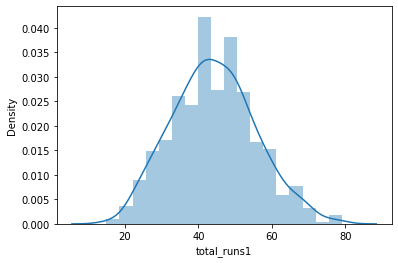

In [40]:
sns.distplot(mat_10['total_runs1'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


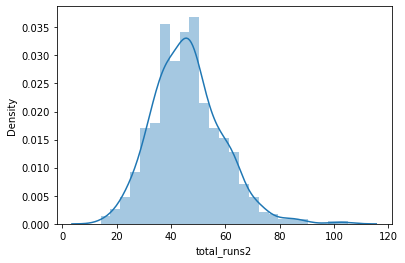

In [41]:
sns.distplot(mat_10['total_runs2'])

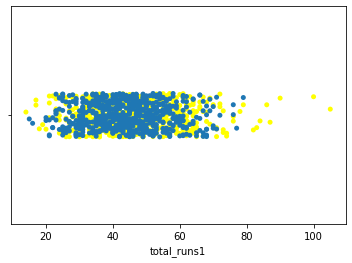

In [42]:
sns.stripplot(x = 'total_runs2' , data = mat_10 , color = 'yellow')
sns.stripplot(x = 'total_runs1' , data = mat_10 )


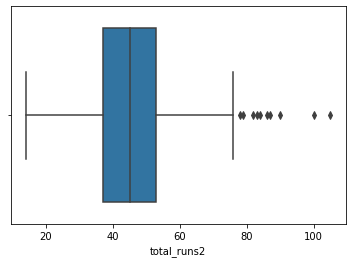

In [43]:
sns.boxplot(x = 'total_runs2' , data = mat_10)

In [44]:
over10

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,wicket
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,None,None,None,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,None,None,None,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,None,None,None,0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,None,None,None,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,None,None,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178986,11415,2,Chennai Super Kings,Mumbai Indians,6,3,SR Watson,SK Raina,SL Malinga,0,0,0,0,0,0,0,0,0,None,None,None,0
178987,11415,2,Chennai Super Kings,Mumbai Indians,6,4,SR Watson,SK Raina,SL Malinga,0,0,0,0,0,0,6,0,6,None,None,None,0
178988,11415,2,Chennai Super Kings,Mumbai Indians,6,5,SR Watson,SK Raina,SL Malinga,0,1,0,0,0,0,1,1,2,None,None,None,0
178989,11415,2,Chennai Super Kings,Mumbai Indians,6,6,SR Watson,SK Raina,SL Malinga,0,0,0,0,0,0,4,0,4,None,None,None,0


In [45]:
summary_10

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,total_runs1,total_runs2,wicket_1,wicket_2,winner_no
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",59.0,54.0,1.0,1.0,1
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,61.0,59.0,1.0,1.0,2
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,52.0,73.0,1.0,0.0,2
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,35.0,56.0,1.0,2.0,2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,41.0,43.0,2.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,43.0,49.0,2.0,2.0,2
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,23.0,31.0,3.0,5.0,2
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,43.0,46.0,1.0,1.0,1
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,38.0,46.0,2.0,2.0,2


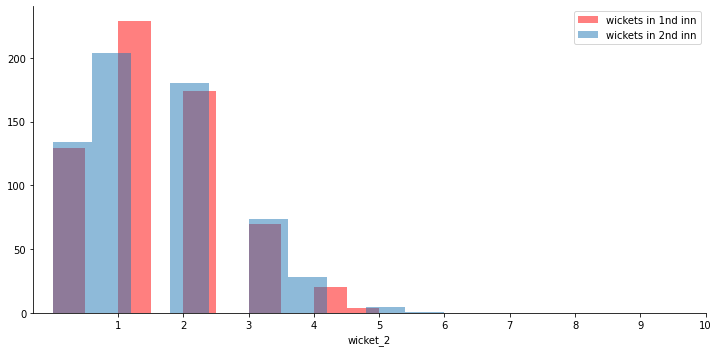

In [46]:
g = sns.FacetGrid(summary_10 , height = 5 ,aspect = 2)
g = g.map(plt.hist, 'wicket_1', color = 'red' , alpha=0.5)
g = g.map(plt.hist , 'wicket_2' , alpha = 0.5)
g.set(xticks=[1,2,3,4,5,6,7,8,9,10])
plt.legend(labels=['wickets in 1nd inn', 'wickets in 2nd inn'])

In [47]:
corr = summary_10.corr()

corr

,id,season,dl_applied,win_by_runs,win_by_wickets,total_runs1,total_runs2,wicket_1,wicket_2,winner_no
id,1.000000,0.472223,0.025018,-0.008438,-0.012406,-0.057740,-0.054738,-0.058178,-0.057659,0.011899
season,0.472223,1.000000,0.004860,-0.014604,0.003376,0.037818,0.107605,-0.079050,0.010456,0.021420
dl_applied,0.025018,0.004860,1.000000,-0.012397,-0.014287,0.003288,0.108844,-0.015791,0.046472,-0.033814
win_by_runs,-0.008438,-0.014604,-0.012397,1.000000,-0.580250,0.237834,-0.227383,-0.259828,0.435017,-0.629051
win_by_wickets,-0.012406,0.003376,-0.014287,-0.580250,1.000000,-0.238066,0.252892,0.300503,-0.435316,0.922422
total_runs1,-0.057740,0.037818,0.003288,0.237834,-0.238066,1.000000,0.166519,-0.482069,0.139793,-0.216474
total_runs2,-0.054738,0.107605,0.108844,-0.227383,0.252892,0.166519,1.000000,-0.058371,-0.364462,0.241963
wicket_1,-0.058178,-0.079050,-0.015791,-0.259828,0.300503,-0.482069,-0.058371,1.000000,-0.152861,0.265373
wicket_2,-0.057659,0.010456,0.046472,0.435017,-0.435316,0.139793,-0.364462,-0.152861,1.000000,-0.378317
winner_no,0.011899,0.021420,-0.033814,-0.629051,0.922422,-0.216474,0.241963,0.265373,-0.378317,1.000000


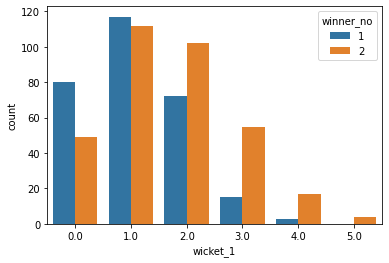

In [48]:
sns.countplot(x = 'wicket_1' , hue = 'winner_no' , data = summary_10)

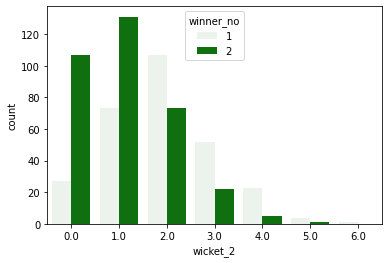

In [49]:
sns.countplot(x = 'wicket_2' , hue = 'winner_no' , data = summary_10 , color = 'green')

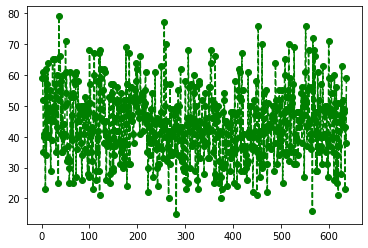

In [50]:
plt.plot('id' ,'total_runs1' , data = summary_10 , color='green', marker='o', linestyle='dashed')

In [51]:
summary_10.groupby(['season' , 'winner_no'])['total_runs1' , 'wicket_1' , 'total_runs2' , 'wicket_2'].agg(['count' , 'mean'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


total_runs1            wicket_1  ... total_runs2 wicket_2          
                       count       mean    count  ...        mean    count      mean
season winner_no                                  ...                               
2008   1                  24  49.333333       24  ...   44.958333       24  2.166667
       2                  34  41.735294       34  ...   49.294118       34  1.088235
2009   1                  27  45.666667       27  ...   39.666667       27  1.888889
       2                  29  42.172414       29  ...   45.310345       29  1.344828
2010   1                  31  49.677419       31  ...   44.516129       31  1.709677
       2                  28  44.357143       28  ...   51.428571       28  0.857143
2011   1                  33  44.787879       33  ...   39.363636       33  2.121212
       2                  39  39.641026       39  ...   48.923077       39  0.948718
2012   1                  34  44.970588       34  ...   41.529412       34  1.852941
       2                  40  40.825000       40  ...   45.950000       40  1.025000
2013   1                  37  42.486486       37  ...   40.540541       37  2.027027
       2                  37  39.540541       37  ...   43.756757       37  1.108108
2014   1                  22  48.272727       22  ...   43.545455       22  1.863636
       2                  37  41.918919       37  ...   48.000000       37  1.054054
2015   1                  32  50.593750       32  ...   44.156250       32  1.906250
       2                  24  41.916667       24  ...   49.083333       24  1.125000
2016   1                  21  46.380952       21  ...   43.666667       21  1.809524
       2                  39  42.512821       39  ...   51.000000       39  1.000000
2017   1                  26  48.500000       26  ...   46.961538       26  2.192308
       2                  32  46.281250       32  ...   56.968750       32  1.375000

[20 rows x 8 columns]

1. whenever team2 has won the matches, most of the times, they have scored more runs than team1 and have lost lesser wickets in the first 10 overs.

In [52]:
summary_10

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,total_runs1,total_runs2,wicket_1,wicket_2,winner_no
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",59.0,54.0,1.0,1.0,1
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,61.0,59.0,1.0,1.0,2
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,52.0,73.0,1.0,0.0,2
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,35.0,56.0,1.0,2.0,2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,41.0,43.0,2.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,43.0,49.0,2.0,2.0,2
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,23.0,31.0,3.0,5.0,2
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,43.0,46.0,1.0,1.0,1
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,38.0,46.0,2.0,2.0,2


In [53]:
df_model = summary_10[['total_runs1' , 'total_runs2' , 'wicket_1' , 'wicket_1' , 'winner_no']]

In [54]:
from sklearn.model_selection import train_test_split

X = df_model.drop(['winner_no'] , axis = 1)
y = df_model['winner_no']


X_train , X_test , y_train , y_test = train_test_split(X , y)

In [55]:
# KNN CLASSIFIER
from sklearn.neighbors import KNeighborsClassifier
neight = KNeighborsClassifier(n_neighbors = 7)

neight.fit(X_train, y_train)

y_pred = neight.predict(X_test)

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[41 30]
 [21 65]]
              precision    recall  f1-score   support

           1       0.66      0.58      0.62        71
           2       0.68      0.76      0.72        86

    accuracy                           0.68       157
   macro avg       0.67      0.67      0.67       157
weighted avg       0.67      0.68      0.67       157



In [57]:
############## KNN HYPER PARAM TUNING################################
############## KNN HYPER PARAM TUNING################################

from sklearn.model_selection import GridSearchCV


leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 2
Best p: 1
Best n_neighbors: 25


In [58]:
neight = KNeighborsClassifier(n_neighbors = 7 , leaf_size = 27 , p = 2)

neight.fit(X_train, y_train)

y_pred = neight.predict(X_test)

In [59]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[41 30]
 [20 66]]
              precision    recall  f1-score   support

           1       0.67      0.58      0.62        71
           2       0.69      0.77      0.73        86

    accuracy                           0.68       157
   macro avg       0.68      0.67      0.67       157
weighted avg       0.68      0.68      0.68       157



In [60]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train , y_train)

y_pred = clf.predict(X_test)

In [61]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[50 21]
 [30 56]]
              precision    recall  f1-score   support

           1       0.62      0.70      0.66        71
           2       0.73      0.65      0.69        86

    accuracy                           0.68       157
   macro avg       0.68      0.68      0.67       157
weighted avg       0.68      0.68      0.68       157



In [62]:
from sklearn.model_selection import validation_curve

param_range = np.arange(1, 250, 2)

train_scoreNum, test_scoreNum = validation_curve(RandomForestClassifier(),X = X_train, y = y_train, 
                                param_name = 'n_estimators', 
                                param_range = param_range, cv = 3)

In [63]:
train_mean = np.mean(train_scoreNum, axis=1)
train_std = np.std(train_scoreNum, axis=1)
test_mean = np.mean(test_scoreNum, axis=1)
test_std = np.std(test_scoreNum, axis=1)

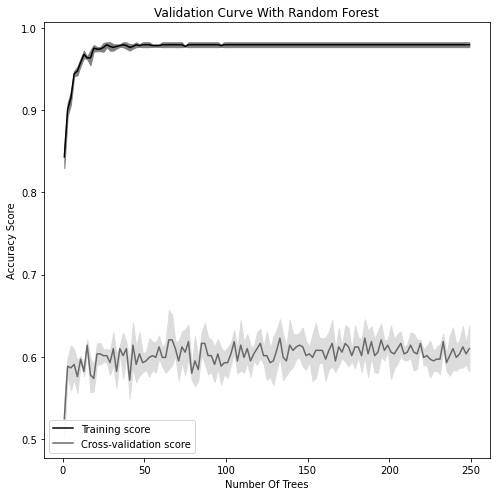

In [64]:
 plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")
 
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [65]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=100, random_state=2)
clf.fit(X_train , y_train)

y_pred = clf.predict(X_test)

In [66]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[45 26]
 [29 57]]
              precision    recall  f1-score   support

           1       0.61      0.63      0.62        71
           2       0.69      0.66      0.67        86

    accuracy                           0.65       157
   macro avg       0.65      0.65      0.65       157
weighted avg       0.65      0.65      0.65       157



In [67]:
n_estimators = [500,800,1500,2500,5000]
max_features = ['auto','sqrt','log2']
max_depth = [10,20,30,40,50,60]
max_depth.append(None)
min_samples_split = [2,5,10,15,20]
min_samples_leaf = [1,2,5,10,15]



grid_param = {'n_estimators': n_estimators,'max_features': max_features,'max_depth' : max_depth,'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf}

In [68]:
from sklearn.model_selection import RandomizedSearchCV

RFC = RandomizedSearchCV(estimator = clf,param_distributions = grid_param,
                            n_iter = 500,
                            cv = 5,
                            verbose = 2,
                            random_state = 42,
                            n_jobs = -1)

In [ ]:
RFC.fit(X_train , y_train)

y_pred = RFC.predict(X_test)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 23.9min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 37.2min


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn import svm
SVC = svm.SVC(decision_function_shape='ovo')
SVC.fit(X_train , y_train)

y_pred = SVC.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [ ]:
summary_10

In [ ]:
############## KNN HYPER PARAM TUNING################################

from sklearn.model_selection import GridSearchCV


leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])